In [6]:
import psycopg2
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter



def connect():
    """ Connect to the PostgreSQL database server """
    conn = None
    try:
        # connect to the PostgreSQL server
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(host = "localhost",
                                dbname = "job_dashboard",
                                user = "job",
                                password = "dashboard",
                                port = 5432)

    except Exception as inst:
            print("I am unable to connect to the database")
            print(inst)
    
    return conn


commands = (
    """
    CREATE TABLE IF NOT EXISTS offre_brute (
        id SERIAL PRIMARY KEY,
        ref VARCHAR(20),
        titre VARCHAR(50),
        entreprise VARCHAR(30),
        ville VARCHAR(40),
        departement VARCHAR(30),
        region VARCHAR(30),
        date_publication VARCHAR(30),
        date_maj VARCHAR(30),
        experience VARCHAR(50),
        salaire VARCHAR(50),
        type_contrat VARCHAR(20),
        intitule VARCHAR(30),
        diplome TEXT,
        secteur TEXT,
        site_origine VARCHAR(20),
        lien_site TEXT,
        corps TEXT
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS intitule (
        id SERIAL PRIMARY KEY,
        nom VARCHAR(30),
        alias VARCHAR(30)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS secteur (
        id SERIAL PRIMARY KEY,
        libelle VARCHAR(30)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS region (
        code_reg VARCHAR(3) PRIMARY KEY,
        nom VARCHAR(30)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS departement (
        code_dep VARCHAR(3) PRIMARY KEY,
        nom VARCHAR(30),
        code_reg VARCHAR(3) REFERENCES region (code_reg)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS ville (
        code_insee VARCHAR(5) PRIMARY KEY,
        nom VARCHAR(40),
        code_dep VARCHAR(3) REFERENCES departement (code_dep)
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS offre (
        id SERIAL PRIMARY KEY,
        ref VARCHAR(20),
        titre VARCHAR(50),
        entreprise VARCHAR(30),
        ville VARCHAR(5) REFERENCES ville (code_insee),
        departement VARCHAR(3) REFERENCES departement (code_dep),
        region VARCHAR(3) REFERENCES region (code_reg),
        date_publication DATE,
        date_maj DATE,
        exp_min INTEGER,
        exp_max INTEGER,
        salaire_min INTEGER,
        salaire_max INTEGER,
        type_contrat VARCHAR(20),
        intitule INTEGER REFERENCES intitule (id),
        diplome_min VARCHAR(30),
        diplome_max VARCHAR(30),
        site_origine VARCHAR(20),
        lien_site TEXT,
        corps TEXT
    )
    """
    ,
    """
    CREATE TABLE IF NOT EXISTS offre_secteur (
        id_secteur INTEGER REFERENCES secteur (id),
        id_offre INTEGER REFERENCES offre (id),
        CONSTRAINT PK_of_sec PRIMARY KEY (id_secteur, id_offre)
    )
    """
)


def query(conn,requete):
    """ Curseur """
    cur = conn.cursor()
    cur.execute(requete)


    
with connect() as conn:
    for command in commands:
        query(conn,command)

        conn.commit()


Connecting to the PostgreSQL database...


In [7]:
Requete = "Insert into offre(ref, titre, entreprise, ville, departement, region, date_publication, date_maj, exp_min, exp_max, salaire_min, salaire_max, type_contrat, intitule, diplome_min, diplome_max, site_origine, lien_site, corps) Values('A4', 'Ingénieur de Données', 'Alpes Cpy', '38185', '38', '82', '02/01/2019', '03/01/2019', 5, 10, 5000, 20000, 'CDD', 1, 'BAC+3', 'BAC+5', 'monster.fr', 'http://www.chercherduboulot.fr', 'Faut pas toucher');"
cur.execute(Requete)

Requete = "Insert into offre(ref, titre, entreprise, ville, departement, region, date_publication, date_maj, exp_min, exp_max, salaire_min, salaire_max, type_contrat, intitule, diplome_min, diplome_max, site_origine, lien_site, corps) Values('A5', 'Ingénieur de Data', 'Grenoble Société', '38185', '38', '83', '02/01/2019', '03/01/2019', 5, 10, 5000, 20000, 'CDD', 1, 'BAC+3', 'BAC+5', 'monster.fr', 'http://www.chercherduboulot.fr', 'Faut pas toucher');"
cur.execute(Requete)






NameError: name 'cur' is not defined

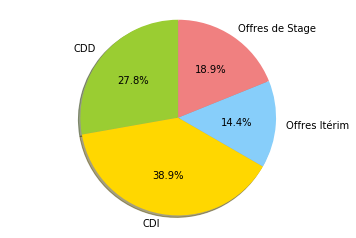

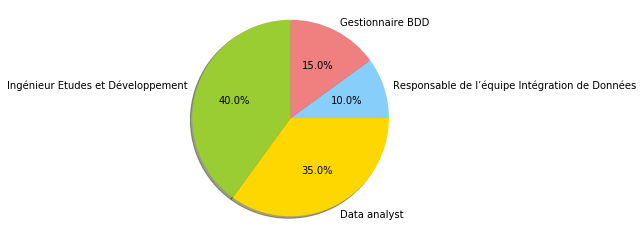

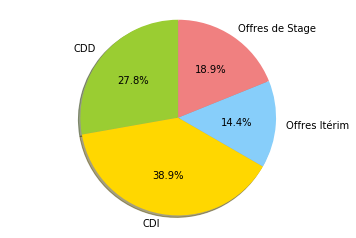

In [8]:
import decimal
import  numpy

def affiche_type_contrat():
    
    Requete = "Select distinct type_contrat From offre;"

    cur = conn.cursor()
    cur.execute(Requete)
    rows = cur.fetchall()
    couleurs = ['red']

    valeur = []
    labels = []
    for row in rows:
        labels.append(row[0])


    labels = 'Ingénieur Etudes et Développement', 'Data analyst', 'Responsable de l’équipe Intégration de Données', 'Gestionnaire BDD'
    labels = 'CDD', 'CDI', 'Offres Itérim', 'Offres de Stage'
    sizes = [25, 35, 13, 17]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

    plt.pie(sizes, labels=labels, colors=colors, 
            autopct='%1.1f%%', shadow=True, startangle=90)

    plt.axis('equal')

    plt.savefig('PieChart02.png')
    plt.show()

    
def affiche_salaire_min():
    
    Requete = "Select distinct salaire_min From offre;"

    cur = conn.cursor()
    cur.execute(Requete)
    rows = cur.fetchall()
    couleurs = ['red']

    valeur = []
    labels = []
    for row in rows:
    #    print(row[0], row[1])
        labels.append(row[0])


    labels = 'Salaire 1', 'Salaire 2', 'Salaire 3', 'Salaire 4'
    labels = 'CDD', 'CDI', 'Offres Itérim', 'Offres de Stage'
    sizes = [25, 35, 13, 17]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

    plt.pie(sizes, labels=labels, colors=colors, 
            autopct='%1.1f%%', shadow=True, startangle=90)

    plt.axis('equal')

    plt.savefig('PieChart02.png')
    plt.show()

def affiche_compte_titre():
    
    Requete = "Select Distinct code_reg, count(titre) From departement group by region;"

    cur = conn.cursor()
    cur.execute(Requete)
    rows = cur.fetchall()
    couleurs = ['red']

    valeur = []
    labels = []
    for row in rows:
    #    print(row[0], row[1])
        labels.append(row[0])
    
    labels = 'Ingénieur Etudes et Développement', 'Data analyst', 'Responsable de l’équipe Intégration de Données', 'Gestionnaire BDD'
    labels = 'CDD', 'CDI', 'Offres Itérim', 'Offres de Stage'
    sizes = [30, 20, 23, 27]
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

    plt.pie(sizes, labels=labels, colors=colors, 
            autopct='%1.1f%%', shadow=True, startangle=90)

    plt.axis('equal')

    plt.savefig('PieChart02.png')
    plt.show()

def affiche_type_titre():
    
    Requete = "Select count(distinct titre) as cout From offre group by region order by cout desc;"

    cur = conn.cursor()
    cur.execute(Requete)
    rows = cur.fetchall()
    couleurs = ['red']

    valeur = []
    labels = []
    sizes = []
    i = 0
    
    results = cur.fetchall()
    # bring the first item of the tuple in your results here
    item_0_in_result = [_[0:3] for _ in results]
    
    for row in rows:
    #    print(row[0], row[1])
        i=i+1
        labels.append(row[0])

    sizes = [40, 35, 10, 15]
    labels = 'Ingénieur Etudes et Développement', 'Data analyst', 'Responsable de l’équipe Intégration de Données', 'Gestionnaire BDD'
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

    plt.pie(sizes, labels=labels, colors=colors, 
            autopct='%1.1f%%', shadow=True, startangle=90)

    plt.axis('equal')

    plt.savefig('PieChart02.png')
    plt.show()
    
affiche_type_contrat()
affiche_type_titre()
affiche_salaire_min()
